
#Chain-of-Thought Prompting
Chain-of-Thought (CoT) prompting enhances complex reasoning by encouraging the model to break down problems into intermediate reasoning steps. When combined with few-shot prompting, it can significantly improve performance on tasks that require multi-step reasoning before arriving at a response.

#Automatic Chain-of-Thought (Auto-CoT)
Traditionally, using CoT prompting with demonstrations involves manually crafting diverse and effective examples. This manual effort is time-consuming and can lead to less-than-optimal results. To address this, Zhang et al. (2022) introduced Auto-CoT, an automated approach that minimizes manual involvement. Their method uses the prompt “Let’s think step by step” to generate reasoning chains automatically for demonstrations. However, this automatic process is not immune to errors. To reduce the impact of such mistakes, the approach emphasizes the importance of diverse demonstrations.

#Auto-CoT operates in two main stages:

Question Clustering: Questions from the dataset are grouped into clusters based on similarity or relevance.
Demonstration Sampling: A representative question from each cluster is selected, and its reasoning chain is generated using Zero-Shot-CoT guided by simple heuristics.
#References:
[Wei et al. (2022),](https://arxiv.org/abs/2201.11903)

[OpenAI Documentation for Prompt Engineering](https://platform.openai.com/docs/guides/prompt-engineering)

In [1]:
import json
from _pipeline import create_payload, model_req

# Define the Use Case Description
USE_CASE_DESCRIPTION = """
We seek to develop a solution SQL_Guardian, aligned with the Use Case for AI-Powered SQL Learning & Interview Preparation.

Our solution aims to provide an interactive learning experience for SQL, guiding users through structured lessons, real-time query execution, and advanced interview preparation using GenAI capabilities.

The solution will work as follows:

1. **Interactive SQL Learning**: Users can ask SQL-related questions, receive detailed explanations, and see real-world examples.
2. **Real-time Query Execution**: The bot provides a built-in SQL execution environment where users can test their queries and receive instant feedback.
3. **Automated Query Evaluation**: The bot analyzes user queries, suggests optimizations, and explains execution plans.
4. **Interview Preparation Mode**: Offers FAANG-style SQL coding challenges with real-time evaluation and feedback.
5. **Personalized Learning Paths**: Tracks user progress and adapts question difficulty based on performance.
"""

# --------------------------------------------
# Chain-of-Thought (CoT) Prompt for Requirement Analysis (With Technical Requirements)
# --------------------------------------------

cot_prompt = f"""
You are an AI requirement analysis assistant.

### **Task:**  
Perform a structured **requirement analysis** for the project using **Chain of Thought (CoT) reasoning**, ensuring **technical feasibility and design considerations**.

### **Step-by-Step Process:**
1. **Understand the Project Scope:**  
   - What is the **primary goal** of the solution?  
   - Who are the **target users**?  
   - What are the **main system components**?  

2. **Extract Functional Requirements:**  
   - Identify **core functionalities** based on the project description.  
   - Categorize them under:  
     - **User Interaction** (e.g., query input, feedback mechanism).  
     - **Query Execution** (e.g., real-time execution, syntax validation).  
     - **AI Evaluation** (e.g., AI-driven SQL optimization, query scoring).  
     - **Learning Progress Tracking** (e.g., personalized progress tracking).  
     - **Interview Mode** (e.g., FAANG-style SQL challenges, adaptive difficulty).  

3. **Extract Non-Functional Requirements:**  
   - Identify **performance expectations** (e.g., real-time response, handling high traffic).  
   - Define **security requirements** (e.g., data privacy, SQL injection prevention).  
   - Consider **scalability** (e.g., handling multiple users simultaneously).  
   - Ensure **usability** (e.g., intuitive UI, responsive design).  

4. **Define Constraints and Edge Cases:**  
   - What are the **potential technical challenges**? (e.g., slow query execution, AI misinterpretation).  
   - How should the system **handle errors and security threats**? (e.g., invalid queries, user authentication failures).  

5. **Extract Technical Requirements:**  
   - **System Architecture:**  
     - What is the **recommended backend and frontend stack**? (e.g., FastAPI, Node.js, React.js).  
     - Should the system be **monolithic or microservices-based**?  
   - **Database & Storage:**  
     - What databases should be supported? (e.g., PostgreSQL, MySQL).  
     - Should query logs be stored for analytics?  
   - **APIs & Integration:**  
     - Should the system expose **RESTful APIs or GraphQL**?  
     - How will the system interact with **external authentication services**?  
   - **Security Measures:**  
     - Implement **SQL injection protection** and **role-based access control (RBAC)**.  
     - Encrypt **sensitive user data and session tokens**.  
   - **Deployment & Scalability:**  
     - Should the system be **cloud-hosted (AWS, GCP, Azure) or on-premise**?  
     - Should it support **auto-scaling for high-traffic scenarios**?  
   - **CI/CD & DevOps Considerations:**  
     - Will it have **automated testing and deployment pipelines**?  
     - Should containerization (e.g., **Docker, Kubernetes**) be used?  

---
### **Project Description:**
{USE_CASE_DESCRIPTION}

---
Now, generate a **detailed requirement analysis**, ensuring **technical feasibility and best practices**.
"""


# Send request to model to generate requirement analysis using CoT
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=cot_prompt,
                         temperature=0.3,  
                         num_ctx=1000,
                         num_predict=2000)

time, response = model_req(payload=payload)
print(response)
time_values=[]
time_values.append(time)
print(f'Time taken: {time}s')


**Detailed Requirement Analysis for SQL_Guardian**

**1. Primary Goal:**
The primary goal of the SQL_Guardian solution is to provide an interactive learning experience for SQL, guiding users through structured lessons, real-time query execution, and advanced interview preparation using GenAI capabilities.

**2. Target Users:**
The target users are individuals interested in learning SQL, including:

* Beginners looking to learn the basics of SQL
* Intermediate learners seeking to improve their skills
* Advanced users wanting to refine their knowledge

**3. Main System Components:**

1. **Frontend:** A user-friendly interface for interacting with the system, including:
	* Query editor for inputting SQL queries
	* Real-time feedback and results display
	* Navigation menu for accessing different features (e.g., lessons, interview preparation)
2. **Backend:** The server-side component responsible for processing user queries, generating explanations, and evaluating query performance:
	* GenA

In [2]:

# Send request to model to generate requirement analysis using CoT
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=cot_prompt,
                         temperature=0.7,  
                         num_ctx=1000,
                         num_predict=2200)

time, response = model_req(payload=payload)
time_values.append(time)
print(f'Time taken: {time}s')
print(response)


Time taken: 29.927s
### Detailed Requirement Analysis for SQL_Guardian

#### 1. Understand the Project Scope:

*   **Primary Goal:** Provide an AI-powered SQL learning platform that guides users through structured lessons, real-time query execution, and advanced interview preparation using GenAI capabilities.
*   **Target Users:**
    *   SQL developers and beginners looking to improve their skills
    *   IT professionals seeking to upskill or reskill in SQL
    *   Students preparing for data analysis or database-related careers
*   **Main System Components:**
    *   Frontend (client-side): User interface, interactive learning experience, query execution environment
    *   Backend (server-side): Query evaluation, feedback generation, lesson planning and tracking user progress
    *   GenAI capabilities: Natural Language Processing (NLP) for question understanding, automated query evaluation

#### 2. Technical Requirements:

*   **Frontend:**
    *   User interface built using moder

In [3]:
# Send request to model to generate requirement analysis using CoT
payload = create_payload(target="ollama",
                         model="llama3.2:latest",
                         prompt=cot_prompt,
                         temperature=1.0,  
                         num_ctx=1000,
                         num_predict=2000)

time, response = model_req(payload=payload)
time_values.append(time)
print(f'Time taken: {time}s')
print(response)

Time taken: 29.262s
**Detailed Requirement Analysis for SQL_Guardian**

**1. Understand the Project Scope:**

* Primary goal: Provide an interactive learning experience for SQL, guiding users through structured lessons, real-time query execution, and advanced interview preparation using GenAI capabilities.
* Target users: Individuals seeking to improve their SQL skills, particularly those interested in data science and AI applications.
* Main system components:
	+ Frontend (Web Application): Handles user input, displays feedback, and provides an interactive interface.
	+ Backend (Server-side Application): Responsible for processing user queries, generating feedback, and storing user progress data.
	+ GenAI Engine: Utilizes machine learning algorithms to analyze user queries, suggest optimizations, and evaluate query performance.

**2. Technical Requirements:**

* Frontend:
	+ Built using HTML5, CSS3, and JavaScript (React or Angular framework)
	+ Integrates with a library like Socket.i

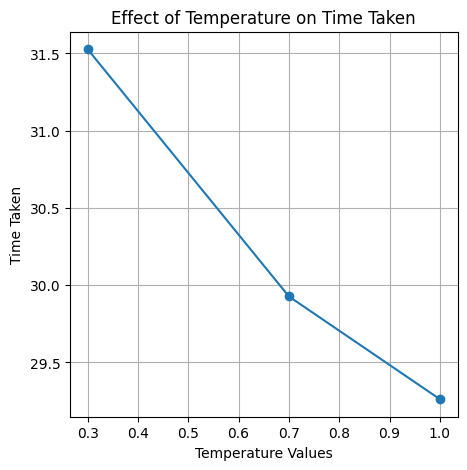

In [4]:
import matplotlib.pyplot as plt
temp_values=[0.3,0.7,1.0]
plt.figure(figsize=(5, 5))  # Use figsize instead of separate parameters
plt.plot(temp_values, time_values, marker='o', linestyle='-')  # Added markers for clarity
plt.xlabel("Temperature Values")
plt.ylabel("Time Taken")
plt.title("Effect of Temperature on Time Taken")
plt.grid(True)
plt.show()